IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

LOAD THE DATASETS

In [2]:
netflix_df = pd.read_csv('imdb_movies_shows.csv', encoding='latin-1')



CLEAN THE DATA

Check for the duplicates: 

In [3]:
duplicates = netflix_df[netflix_df.duplicated()]
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


Drop unnecessary columns: 

In [4]:
netflix_df.columns

Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [5]:
netflix_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [6]:
netflix_df.drop(columns = ['imdb_id'], inplace = True)

In [7]:
netflix_df.columns

Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes'],
      dtype='object')

Check and correct datatypes if any found:

In [8]:
netflix_df.dtypes

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_score              float64
imdb_votes              float64
dtype: object

ALL DATATYPES SEEMS TO BE CORRECT!

Check missing values: 

In [9]:
netflix_df.isna().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_score               523
imdb_votes               539
dtype: int64

In [10]:
netflix_df.shape

(5806, 10)

Handling missing value approach used: I will simply replace null values in column 'age_certification' will "Unknown" to not cause any bias in dataset. for the column 'seasons' we will replace with 'not applicable' as its empty for all movies type. for columns 'imdb_score' and 'imdb_votes', we will first assess the distribution of data then assess which imputation to use to replace null values. 

In [11]:
netflix_df['age_certification'].fillna('Unknown', inplace=True)
netflix_df['seasons'].fillna('Not_Applicable', inplace=True)
netflix_df.dropna(subset = 'title',inplace = True)

In [12]:
netflix_df.isna().sum()

title                     0
type                      0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score              522
imdb_votes              538
dtype: int64

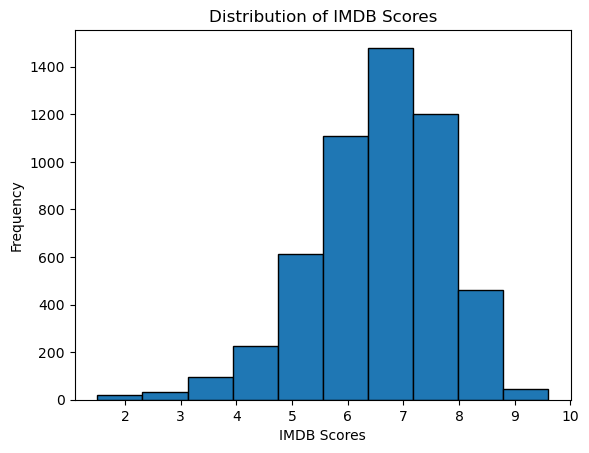

In [13]:
netflix_df['imdb_score'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('IMDB Scores')
plt.ylabel('Frequency')
plt.title('Distribution of IMDB Scores')
plt.show()

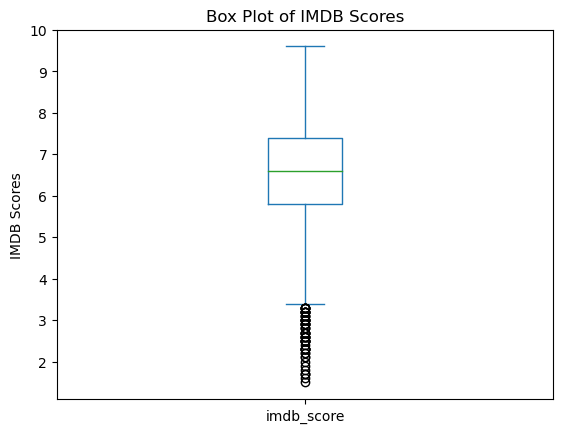

In [14]:
netflix_df['imdb_score'].plot(kind='box')
plt.ylabel('IMDB Scores')
plt.title('Box Plot of IMDB Scores')
plt.show()

In [15]:
netflix_df['imdb_score'].median()

6.6

In [16]:
netflix_df['imdb_score'].mean()

6.5334469051675175

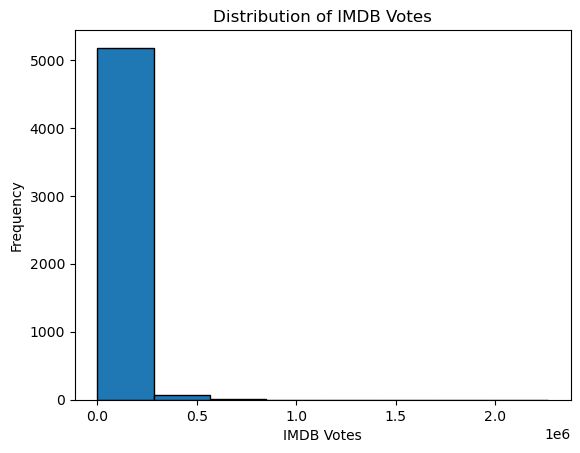

In [17]:
netflix_df['imdb_votes'].plot(kind='hist', bins=8, edgecolor='black')
plt.xlabel('IMDB Votes')
plt.ylabel('Frequency')
plt.title('Distribution of IMDB Votes')
plt.show()

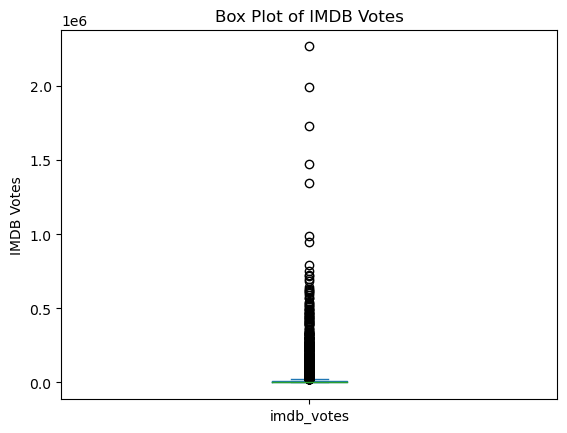

In [18]:
netflix_df['imdb_votes'].plot(kind='box')
plt.ylabel('IMDB Votes')
plt.title('Box Plot of IMDB Votes')
plt.show()

In [19]:
netflix_df['imdb_votes'].describe()

count    5.267000e+03
mean     2.340719e+04
std      8.713432e+04
min      5.000000e+00
25%      5.210000e+02
50%      2.279000e+03
75%      1.014400e+04
max      2.268288e+06
Name: imdb_votes, dtype: float64

Since the columns are skewed especially imdb_votes is heavily rightly skewed, we will simply replace null values with median. 

In [20]:
netflix_df['imdb_score'].fillna(netflix_df['imdb_score'].median(), inplace=True)
netflix_df['imdb_votes'].fillna(netflix_df['imdb_votes'].median(), inplace=True)

In [21]:
netflix_df.isna().sum()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
dtype: int64

EXPLORATORY DATA ANALYSIS (EDA)

Distribution of Content Types:


In [22]:
netflix_df.columns

Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [23]:
netflix_df.shape

(5805, 10)

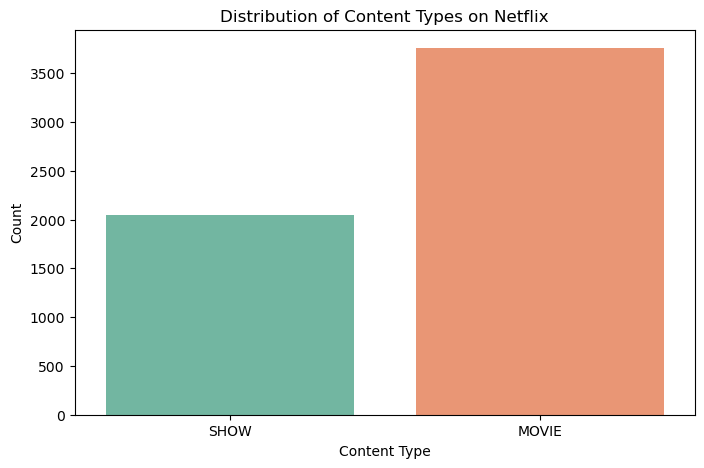

In [24]:
# Distribution of content types (Movies vs. TV Shows)
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=netflix_df, palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


Top Genres on Netflix:

In [25]:
netflix_df['genres']

0                       ['documentation']
1                      ['crime', 'drama']
2                   ['comedy', 'fantasy']
3                              ['comedy']
4                              ['horror']
                      ...                
5801                 ['romance', 'drama']
5802           ['music', 'documentation']
5803                  ['family', 'drama']
5804               ['action', 'thriller']
5805    ['family', 'comedy', 'animation']
Name: genres, Length: 5805, dtype: object

In [26]:
netflix_df.dtypes

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                  object
imdb_score              float64
imdb_votes              float64
dtype: object

In [27]:
netflix_df['genres'] 

0                       ['documentation']
1                      ['crime', 'drama']
2                   ['comedy', 'fantasy']
3                              ['comedy']
4                              ['horror']
                      ...                
5801                 ['romance', 'drama']
5802           ['music', 'documentation']
5803                  ['family', 'drama']
5804               ['action', 'thriller']
5805    ['family', 'comedy', 'animation']
Name: genres, Length: 5805, dtype: object

Removing quotes in genres column: 

In [28]:
netflix_df['genres'] = netflix_df['genres'].apply(lambda x: [genre.strip(" '[]") for genre in x.split(',')])
netflix_df['genres']

0                   [documentation]
1                    [crime, drama]
2                 [comedy, fantasy]
3                          [comedy]
4                          [horror]
                   ...             
5801               [romance, drama]
5802         [music, documentation]
5803                [family, drama]
5804             [action, thriller]
5805    [family, comedy, animation]
Name: genres, Length: 5805, dtype: object

Converting genres column from list type to string type:

In [29]:
 netflix_df['genres'] = netflix_df['genres'].apply(lambda x: ', '.join(x))

Summing up individual values for each different genre: 

In [30]:
genres =  netflix_df['genres'].str.get_dummies(sep=', ')
top_genres = genres.sum().sort_values(ascending=False).head(10)


Plotting the bargraph for top 10 genres:

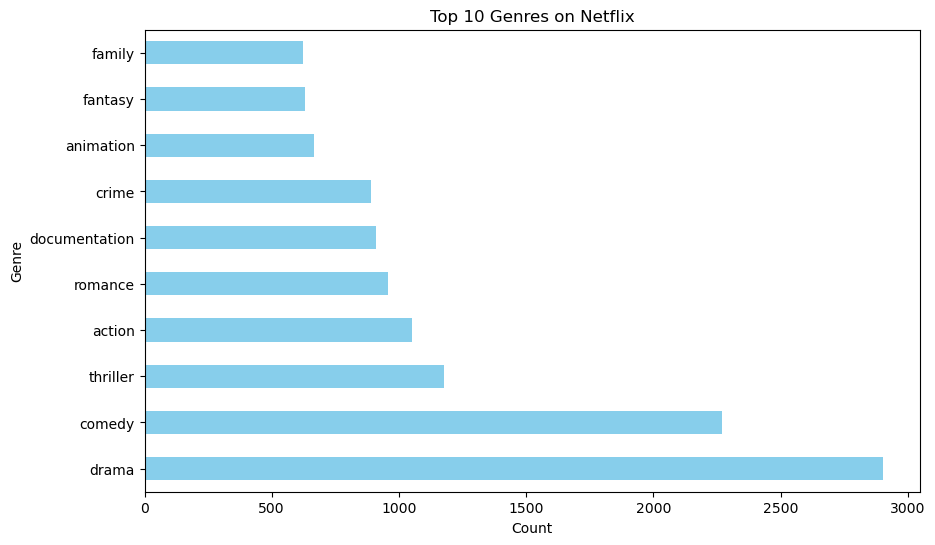

In [31]:
plt.figure(figsize=(10, 6))
top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Top 10 Production Countries on Netflix: 

In [33]:
netflix_df.dtypes

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                  object
imdb_score              float64
imdb_votes              float64
dtype: object

In [34]:
netflix_df['production_countries'] = netflix_df['production_countries'].apply(lambda x: [production_countries.strip(" '[]") for production_countries in x.split(',')])
netflix_df['production_countries']

0           [US]
1           [US]
2           [GB]
3           [GB]
4           [US]
          ...   
5801        [NG]
5802          []
5803    [NG, CA]
5804          []
5805          []
Name: production_countries, Length: 5805, dtype: object

In [35]:
netflix_df['production_countries'] = netflix_df['production_countries'].apply(lambda x: ', '.join(x))

In [36]:
netflix_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,US,1.0,6.6,2279.0
1,Taxi Driver,MOVIE,1976,R,113,"crime, drama",US,Not_Applicable,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"comedy, fantasy",GB,Not_Applicable,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,comedy,GB,Not_Applicable,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,horror,US,Not_Applicable,8.1,391942.0


In [37]:
unique_counts = netflix_df['production_countries'].value_counts()
unique_counts


production_countries
US                1950
IN                 605
JP                 266
                   231
GB                 219
                  ... 
PR, US, GB, CN       1
GB, US, FR           1
IT, ES, FR           1
GB, US, CZ           1
NG, CA               1
Name: count, Length: 449, dtype: int64

In [38]:
netflix_df['production_countries']

0           US
1           US
2           GB
3           GB
4           US
         ...  
5801        NG
5802          
5803    NG, CA
5804          
5805          
Name: production_countries, Length: 5805, dtype: object

In [39]:
prod_countries_count =  netflix_df['production_countries'].str.get_dummies(sep=', ')
top_prodcountries = prod_countries_count.sum().sort_values(ascending=False).head(10)

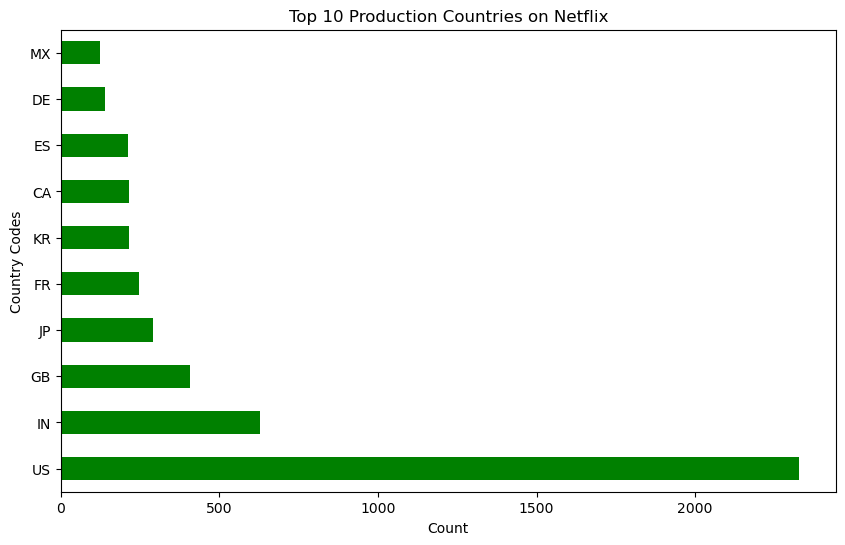

In [40]:
plt.figure(figsize=(10, 6))
top_prodcountries.plot(kind='barh', color='green')
plt.title('Top 10 Production Countries on Netflix')
plt.xlabel('Count')
plt.ylabel('Country Codes')
plt.show()

IMDb Ratings Distribution:

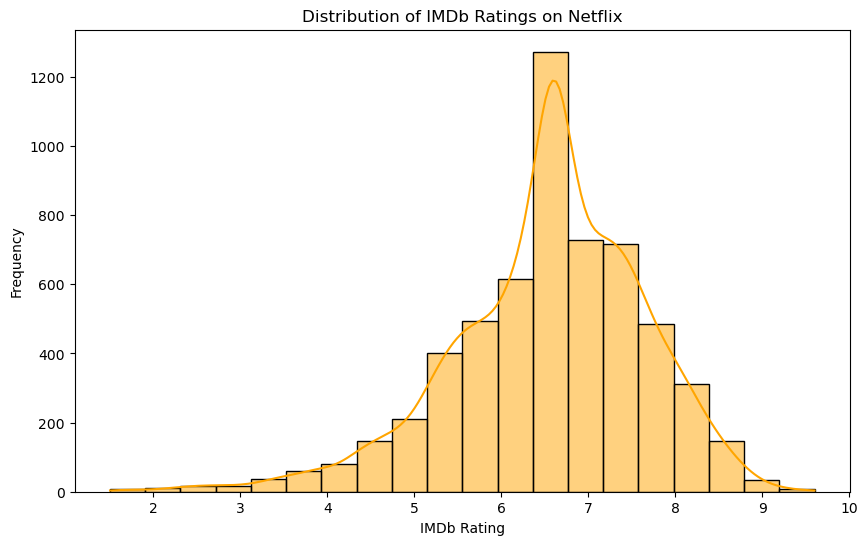

In [41]:
# Distribution of IMDb ratings
plt.figure(figsize=(10, 6))
sns.histplot(netflix_df['imdb_score'], bins=20, kde=True, color='orange')
plt.title('Distribution of IMDb Ratings on Netflix')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()


Relationship between IMDb Ratings and Number of Votes:

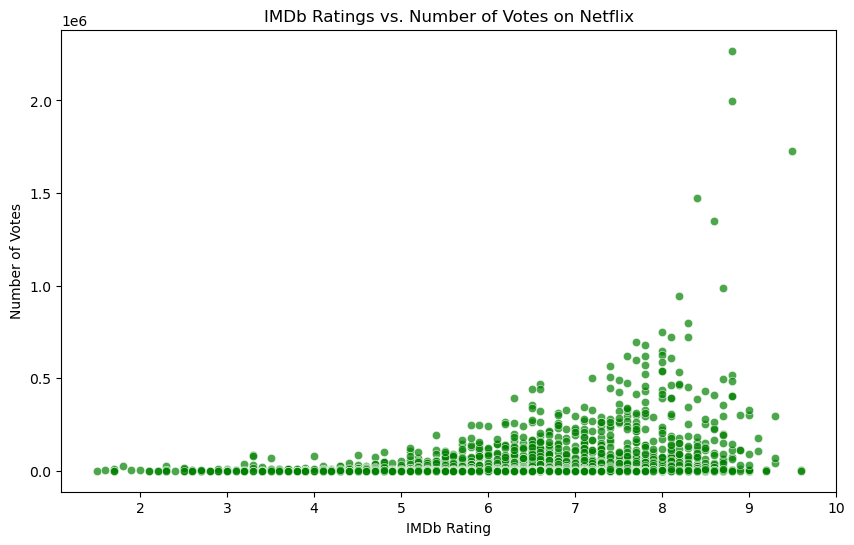

In [42]:
# Scatter plot of IMDb ratings vs. number of votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='imdb_score', y='imdb_votes', data=netflix_df, color='green', alpha=0.7)
plt.title('IMDb Ratings vs. Number of Votes on Netflix')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Votes')
plt.show()


Above scatterplot shows that there is no significant linear relation between ratings and votes between 1-5 ratings. Once ratings go above 5, we notice higher number of votes also. This shows that for highly rates shows and movies, there seems to be higher viewer engagement and popularity.

Trends Over Time:

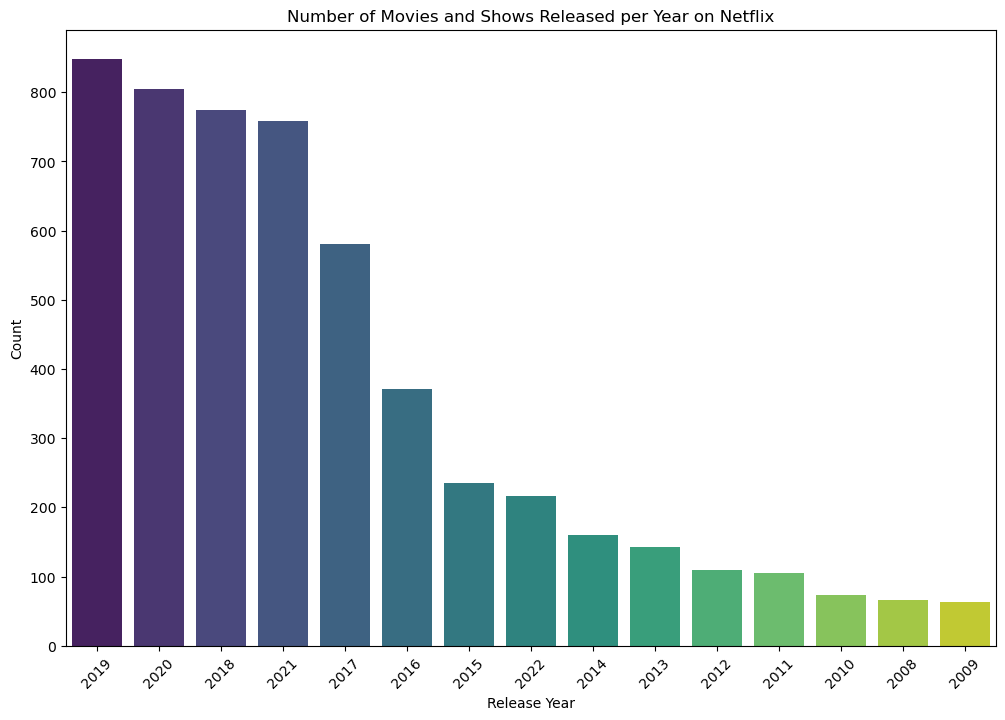

In [43]:
# Number of movies and shows released per year
plt.figure(figsize=(12, 8))
sns.countplot(x='release_year', data=netflix_df, palette='viridis', order=netflix_df['release_year'].value_counts().index[:15])
plt.title('Number of Movies and Shows Released per Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Popular Genres and IMDb Ratings:

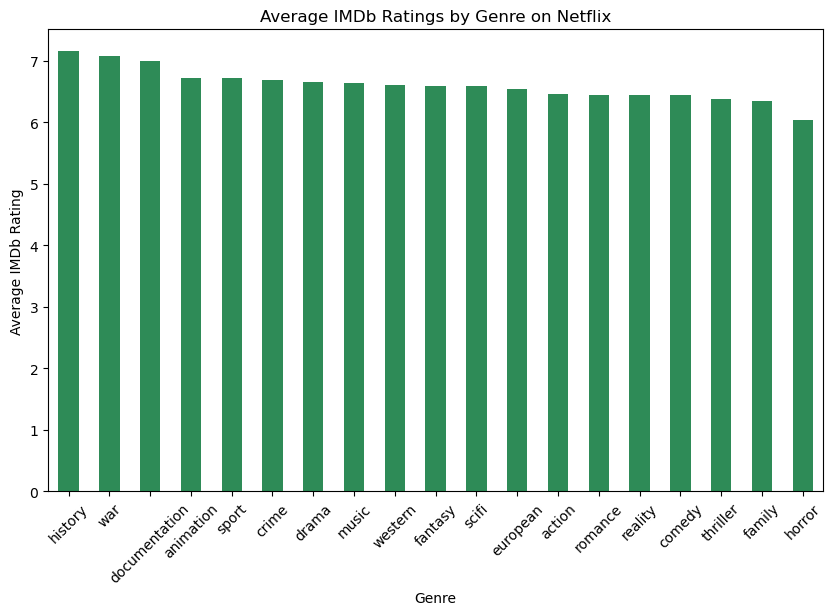

In [44]:
# Average IMDb ratings by genre
avg_ratings_by_genre = genres.apply(lambda x: netflix_df['imdb_score'].where(x==1).mean()).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_ratings_by_genre.plot(kind='bar', color='seagreen')
plt.title('Average IMDb Ratings by Genre on Netflix')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=45)
plt.show()


Viewer Engagement Analysis:

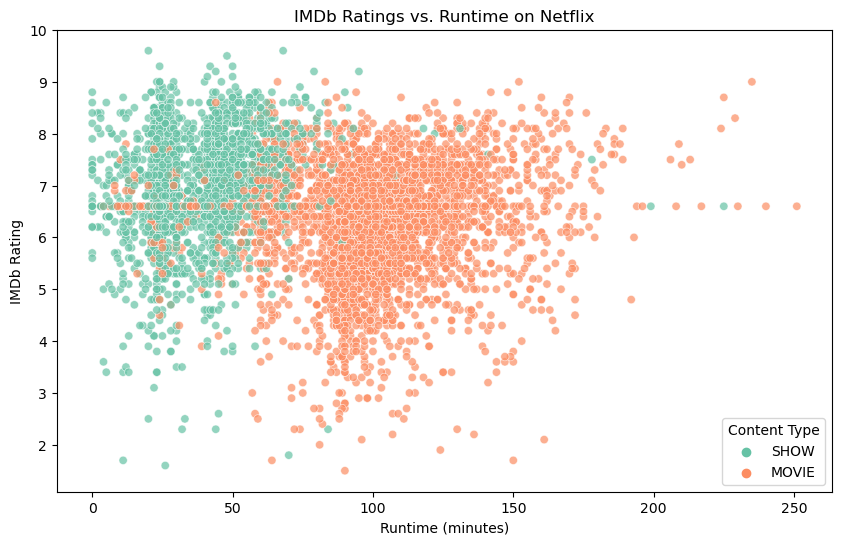

In [45]:
# IMDb ratings vs. runtime
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='imdb_score', data=netflix_df, hue='type', palette='Set2', alpha=0.7)
plt.title('IMDb Ratings vs. Runtime on Netflix')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.legend(title='Content Type')
plt.show()


No correlation seen between runtime and IMDB ratings for either show or movies. 

Distribution of Ratings:

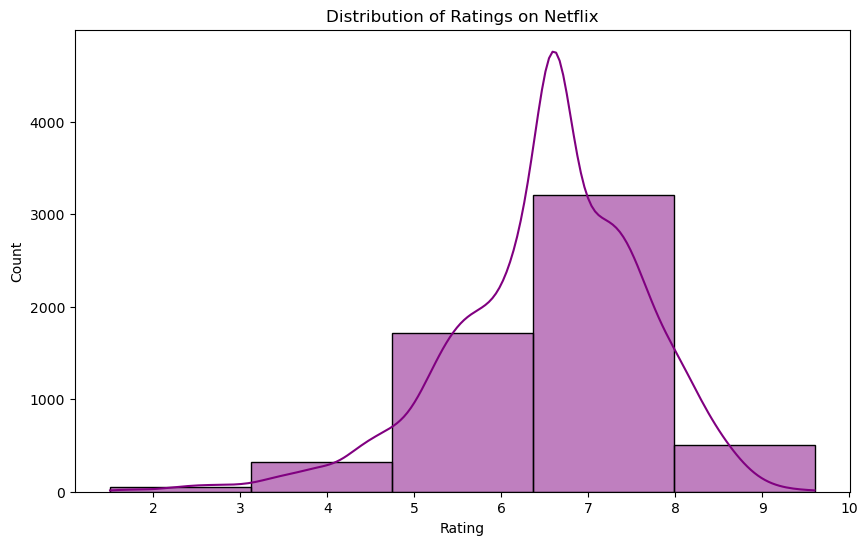

In [46]:
# Distribution of ratings with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(netflix_df['imdb_score'], bins=5, kde=True, color='purple')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Age Certification Distribution:

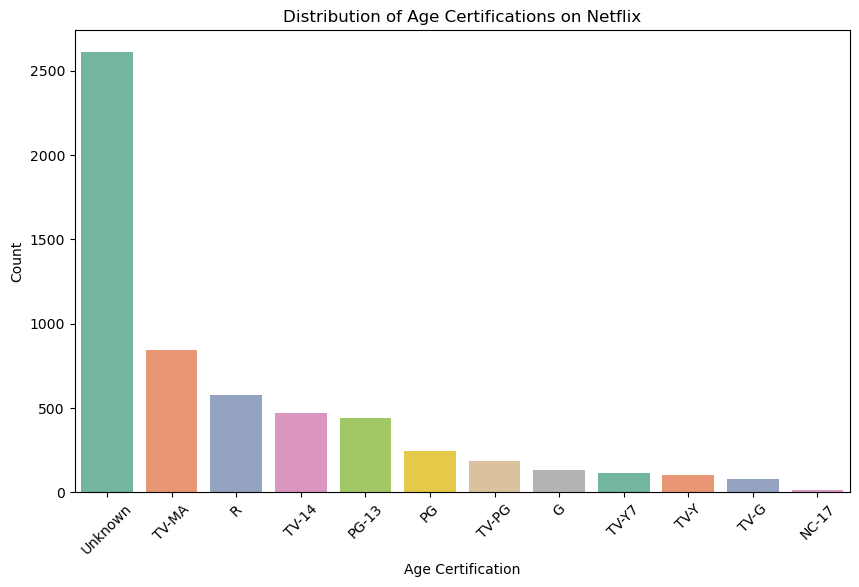

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_certification', data=netflix_df, palette='Set2', order=netflix_df['age_certification'].value_counts().index)
plt.title('Distribution of Age Certifications on Netflix')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Seasons Distribution (for TV Shows):

/var/folders/s1/nty4xprd77v70fvqn5wrds380000gn/T/ipykernel_38735/1560709538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['seasons'].fillna(0)  # Replace NaN values with 0 for shows with no seasons listed
/var/folders/s1/nty4xprd77v70fvqn5wrds380000gn/T/ipykernel_38735/1560709538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = pd.to_numeric(tv_shows['seasons'], errors='coerce')


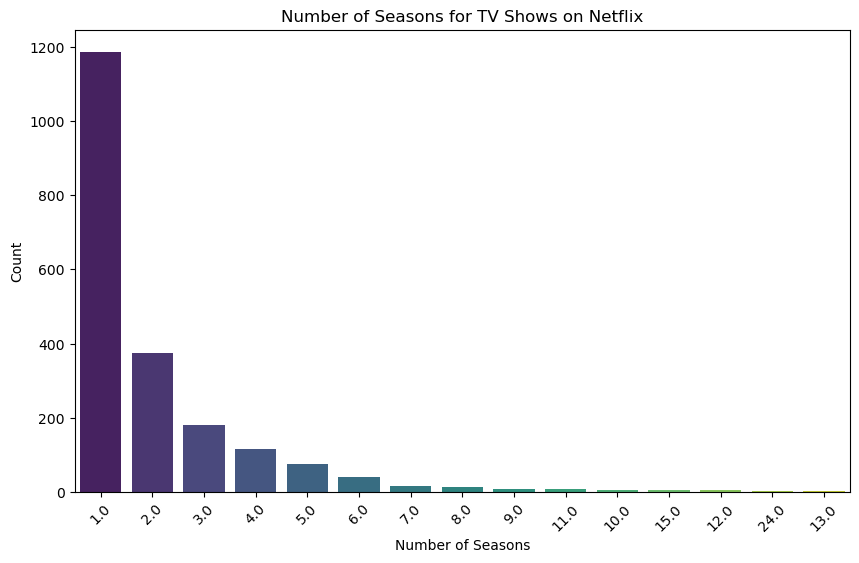

In [51]:
# Filter out TV shows and handle NaN values in seasons
tv_shows = netflix_df[netflix_df['type'] == 'SHOW']
tv_shows['seasons'] = tv_shows['seasons'].fillna(0)  # Replace NaN values with 0 for shows with no seasons listed

# Convert seasons to numeric (in case it's not already)
tv_shows['seasons'] = pd.to_numeric(tv_shows['seasons'], errors='coerce')

# Remove rows where seasons are NaN (if any)
tv_shows = tv_shows.dropna(subset=['seasons'])

# Plotting the distribution of seasons
plt.figure(figsize=(10, 6))
sns.countplot(x='seasons', data=tv_shows, palette='viridis', order=tv_shows['seasons'].value_counts().index[:15])
plt.title('Number of Seasons for TV Shows on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [50]:
netflix_df['type']

0        SHOW
1       MOVIE
2       MOVIE
3       MOVIE
4       MOVIE
        ...  
5801    MOVIE
5802    MOVIE
5803    MOVIE
5804    MOVIE
5805     SHOW
Name: type, Length: 5805, dtype: object

Ratings difference between shows and movies: 

In [52]:
# Filter for movies and shows separately
movies = netflix_df[netflix_df['type'] == 'MOVIE']
shows = netflix_df[netflix_df['type'] == 'SHOW']

# Calculate average IMDb ratings for movies and shows
avg_ratings_movies = movies['imdb_score'].mean()
avg_ratings_shows = shows['imdb_score'].mean()

# Create a DataFrame for plotting
avg_ratings_df = pd.DataFrame({
    'Content Type': ['Movies', 'TV Shows'],
    'Average IMDb Rating': [avg_ratings_movies, avg_ratings_shows]
})


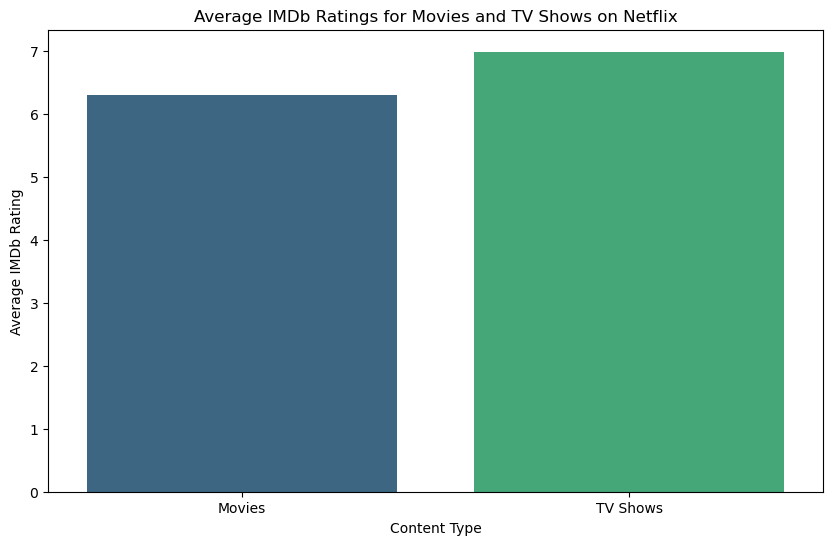

In [53]:
# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

sns.barplot(x='Content Type', y='Average IMDb Rating', data=avg_ratings_df, palette='viridis')

plt.title('Average IMDb Ratings for Movies and TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Average IMDb Rating')

plt.show()


Visualize Correlation Between TV Show Seasons and IMDb Ratings:


In [54]:
# Filter for TV shows and ensure 'seasons' and 'imdb_ratings' columns are numeric
tv_shows = netflix_df[netflix_df['type'] == 'SHOW']
tv_shows['seasons'] = pd.to_numeric(tv_shows['seasons'], errors='coerce')  # Convert 'seasons' to numeric
tv_shows = tv_shows.dropna(subset=['seasons', 'imdb_score'])  # Drop NaN values in relevant columns


/var/folders/s1/nty4xprd77v70fvqn5wrds380000gn/T/ipykernel_38735/2027764600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = pd.to_numeric(tv_shows['seasons'], errors='coerce')  # Convert 'seasons' to numeric


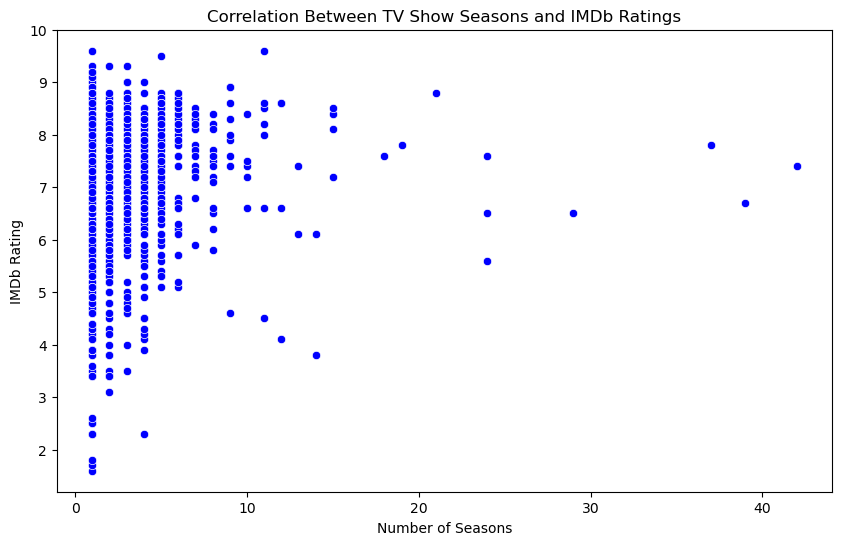

In [56]:
# Plotting correlation between TV show seasons and IMDb ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='seasons', y='imdb_score', data=tv_shows, color='blue')
plt.title('Correlation Between TV Show Seasons and IMDb Ratings')
plt.xlabel('Number of Seasons')
plt.ylabel('IMDb Rating')
plt.show()


No significant correlation noticed. 